# Explore

<a href="https://colab.research.google.com/github/inspektral/sonic-trajectories/blob/main/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'sonic-trajectories'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/sonic-trajectories.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies
        !git clone https://github.com/inspektral/music2latent.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils
import test_signals


2025-07-07 10:43:56.253981: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 10:43:56.422574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-07 10:43:56.455525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-07 10:43:56.468289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-07 10:43:56.666666: I tensorflow/core/platform/cpu_feature_guar

In [3]:
tests = test_signals.get_tests()
print(f"{len(tests)} tests found:")
for key in tests.keys():
    print(f"{key}")

print("available metrics:")
print(utils.get_available_metrics())

print("available representations:")
print(utils.get_available_representations())

13 tests found:
square_slow
square_fast
square_vibrato
saw_noise
sines_noise
filter_saw
triangle_clip
fm_amplitude
fm_frequency
delay_noise
delay_saw
reverb_noise
reverb_saw
available metrics:
['magnitude', 'distances', 'cosine_similarity']
available representations:
['mfcc', 'cqt', 'spectrum', 'music2latent', 'dac']


In [4]:
plots = [
    ["square_slow", "music2latent", "magnitude"],
    ["square_vibrato", "cqt", "magnitude"],
    ["square_vibrato", "dac", "distances"],
    ["sines_noise", "music2latent", "magnitude"],
    ["filter_saw", "cqt", "distances"],
    ["filter_saw", "music2latent", "magnitude"],
    ["triangle_clip", "music2latent", "magnitude"],
    ["fm_amplitude", "cqt", "magnitude"],
    ["fm_amplitude", "music2latent", "cosine_similarity"],
    ["fm_frequency", "cqt", "magnitude"],
    ["delay_saw", "music2latent", "magnitude"],
    ["reverb_noise", "dac", "magnitude"]
]

In [42]:
INDEX = 3

TEST = plots[INDEX][0]
REPR = plots[INDEX][1]
METRIC = plots[INDEX][2]


In [43]:
audio, modulator, audio_no_mod = tests[TEST](no_mod = True)
length = int(len(modulator) / 10)

def norm_stretch(arr, length):
    arr = utils.norm(arr)
    arr = utils.stretch_array(arr, length)
    return arr

modulator = norm_stretch(modulator, length)
repr = utils.calc_representation(audio, REPR)
repr_no_mod = utils.calc_representation(audio_no_mod, REPR)



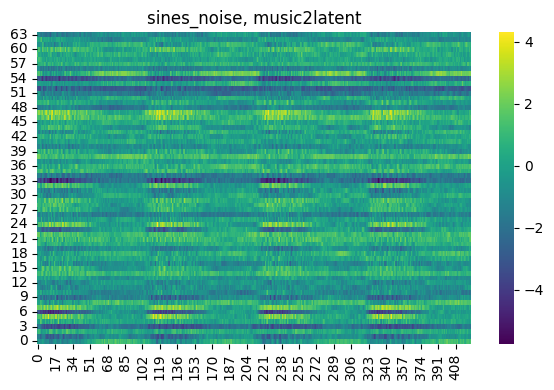

In [44]:
utils.plot_heatmap(repr, title=f"{TEST}, {REPR}", small=True)

metric_all shape: (35280,)
metric_no_mod shape: (17640,)
metric shape: (17640,)


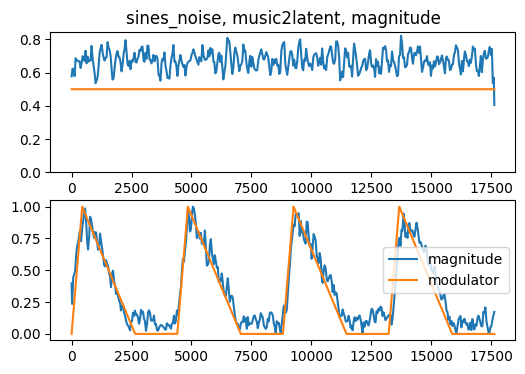

In [45]:
metric = utils.calc_metric(repr, METRIC)
metric_no_mod = utils.calc_metric(repr_no_mod, METRIC)
metric_all = utils.norm_stretch(np.concatenate((metric_no_mod, metric)), length*2)

print(f"metric_all shape: {metric_all.shape}")

metric_no_mod = metric_all[:length]
metric = metric_all[length:]

print(f"metric_no_mod shape: {metric_no_mod.shape}")
print(f"metric shape: {metric.shape}")

plt.figure(figsize=(6,4))
plt.subplot(2, 1, 1)
plt.title(f"{TEST}, {REPR}, {METRIC}")
plt.plot(metric_no_mod, label=f'{METRIC}')
plt.plot(np.ones_like(metric_no_mod)*0.5, label='modulator')
plt.ylim(bottom=0)

plt.subplot(2, 1, 2)
plt.plot(metric, label=METRIC)
plt.plot(modulator, label='modulator')
plt.legend()
plt.show()

In [46]:
repr.shape

(64, 424)

In [47]:
METRIC = "activation (a[46] = 1)"

activation = np.zeros(repr.shape[0])
print(f"activation shape: {activation.shape}")
activation[46] = 1

activation shape: (64,)


metric_all shape: (35280,)
metric_no_mod shape: (17640,)
metric shape: (17640,)


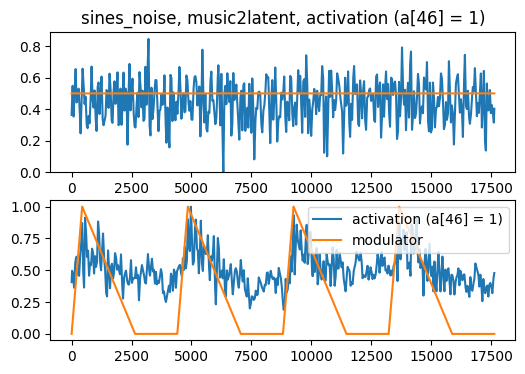

In [48]:
metric = activation @ repr
metric_no_mod = activation @ repr_no_mod


metric_all = utils.norm_stretch(np.concatenate((metric_no_mod, metric)), length*2)

print(f"metric_all shape: {metric_all.shape}")

metric_no_mod = metric_all[:length]
metric = metric_all[length:]

print(f"metric_no_mod shape: {metric_no_mod.shape}")
print(f"metric shape: {metric.shape}")

plt.figure(figsize=(6,4))
plt.subplot(2, 1, 1)
plt.title(f"{TEST}, {REPR}, {METRIC}")
plt.plot(metric_no_mod, label=f'{METRIC}')
plt.plot(np.ones_like(metric_no_mod)*0.5, label='modulator')
plt.ylim(bottom=0)

plt.subplot(2, 1, 2)
plt.plot(metric, label=METRIC)
plt.plot(modulator, label='modulator')
plt.legend()
plt.show()